In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
file='/content/drive/MyDrive/NYPD_Arrest_Data__Year_to_Date__20240707.csv'

In [8]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

In [9]:
data_crime = pd.read_csv("/content/drive/MyDrive/NYPD_Arrest_Data__Year_to_Date__20240707.csv")

In [9]:
data_crime.tail()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
63616,282877412,02/27/2024,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,K,60,0,45-64,M,WHITE HISPANIC,987154,149165,40.576100,-73.989545,POINT (-73.989545 40.5761)
63617,283628088,03/12/2024,511.0,"CONTROLLED SUBSTANCE, POSSESSI",235.0,DANGEROUS DRUGS,PL 2200300,M,M,13,0,45-64,M,BLACK,985689,208933,40.740151,-73.994805,POINT (-73.994805 40.740151)
63618,283387006,03/07/2024,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 160102A,F,K,73,0,25-44,M,BLACK,1008227,183789,40.671104,-73.913562,POINT (-73.913562 40.671104)
63619,283013910,03/01/2024,922.0,"TRAFFIC,UNCLASSIFIED MISDEMEAN",348.0,VEHICLE AND TRAFFIC LAWS,VTL05110A4,M,K,83,0,25-44,F,BLACK,1007120,193913,40.698894,-73.917522,POINT (-73.91752179908735 40.698893568968515)
63620,283495531,03/10/2024,203.0,"TRESPASS 3, CRIMINAL",352.0,CRIMINAL TRESPASS,PL 140100A,M,S,123,0,25-44,M,WHITE,930842,133050,40.531707,-74.192126,POINT (-74.192126 40.531707)


In [10]:
boro_cries = data_crime.groupby(['ARREST_DATE']).agg({'ARREST_DATE':'count'})

boro_cries.head()

,ARREST_DATE
ARREST_DATE,
01/01/2024,466
01/02/2024,643
01/03/2024,826
01/04/2024,872
01/05/2024,670


In [11]:
data_crime.replace({'K':'Brooklyn'}, inplace=True)
data_crime.replace({'Q':'Queens'}, inplace=True)
data_crime.replace({'B':'Bronx'}, inplace=True)
data_crime.replace({'M':'Manhattan'}, inplace=True)
data_crime.replace({'S':'Staten Island'}, inplace=True)

In [12]:
boro_cries = data_crime.groupby(['ARREST_BORO']).agg({'ARREST_KEY':'count'})
top_crimes = boro_cries.sort_values(by='ARREST_KEY', ascending=False)
top_crimes.head()

,ARREST_KEY
ARREST_BORO,
Brooklyn,17402
Manhattan,15324
Bronx,14221
Queens,13782
Staten Island,2892


In [13]:
top_crimes_prop = top_crimes.assign(propotion = top_crimes.ARREST_KEY / sum(top_crimes.ARREST_KEY))
top_crimes_prop = top_crimes_prop.reset_index()

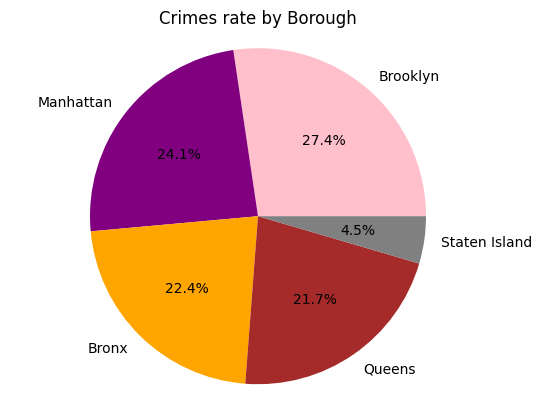

In [14]:
x = top_crimes_prop.ARREST_BORO
y = top_crimes_prop.propotion
colors = ['pink', 'purple', 'orange', 'brown', 'gray']
plt.pie(top_crimes_prop.propotion, labels=top_crimes_prop.ARREST_BORO, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Crimes rate by Borough')
plt.show()

In [15]:
data_crime_time = data_crime.loc[:, ['ARREST_BORO', 'ARREST_PRECINCT']]
data_crime_time.head()

,ARREST_BORO,ARREST_PRECINCT
0,Manhattan,26
1,Brooklyn,77
2,Queens,106
3,Bronx,49
4,Brooklyn,81


Text(0.5, 1.0, 'Top 10 Arrest Precincts by Borough')

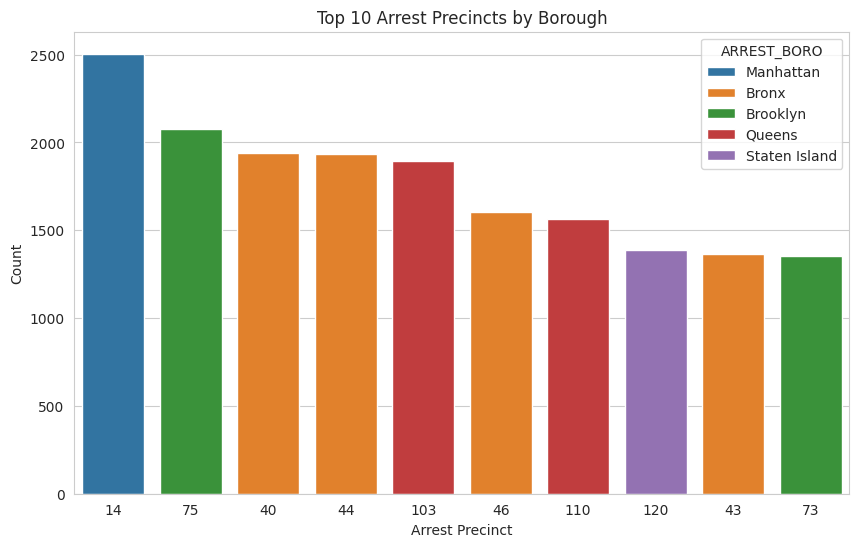

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
top_n = 10
top_precincts = data_crime_time['ARREST_PRECINCT'].value_counts().nlargest(top_n).index
top5_precincts_data = data_crime_time[data_crime_time['ARREST_PRECINCT'].isin(top_precincts)]

plt.figure(figsize=(10, 6))
sns.countplot(x='ARREST_PRECINCT', hue='ARREST_BORO', data=top5_precincts_data,
              order=top_precincts)
plt.xlabel('Arrest Precinct')
plt.ylabel('Count')
plt.title('Top {} Arrest Precincts by Borough'.format(top_n))

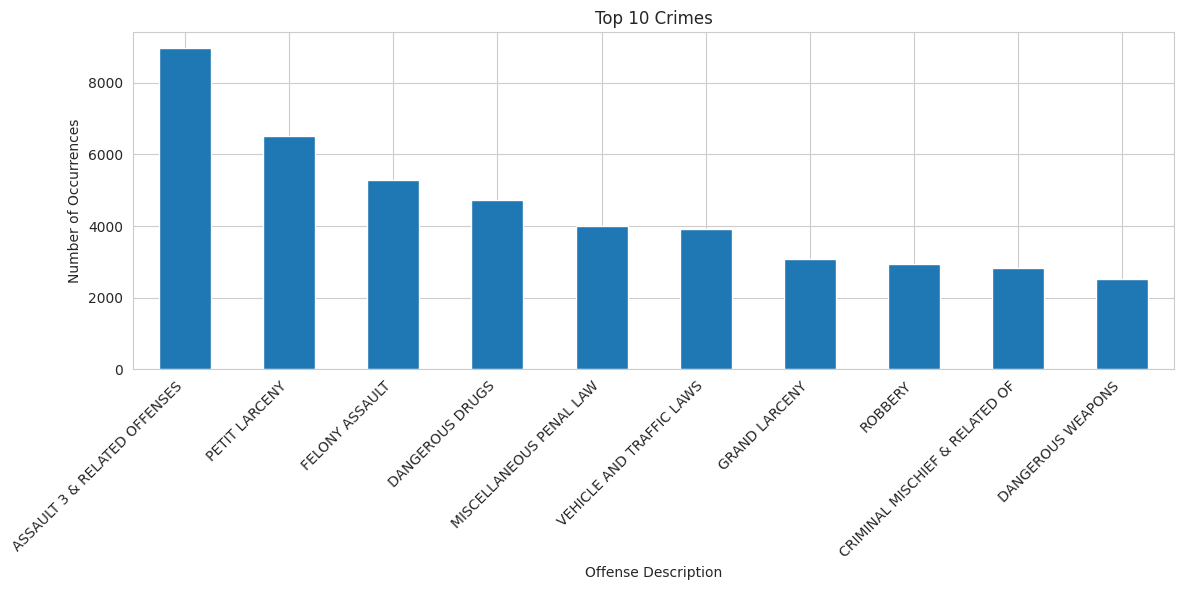

In [17]:
import matplotlib.pyplot as plt

crime_counts = data_crime['OFNS_DESC'].value_counts().head(10)

plt.figure(figsize=(12, 6))
crime_counts.plot(kind='bar')
plt.xlabel('Offense Description')
plt.ylabel('Number of Occurrences')
plt.title('Top 10 Crimes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Index(['ARREST_BORO', 'ARREST_PRECINCT', 'PERP_RACE', 'PERP_SEX'], dtype='object')


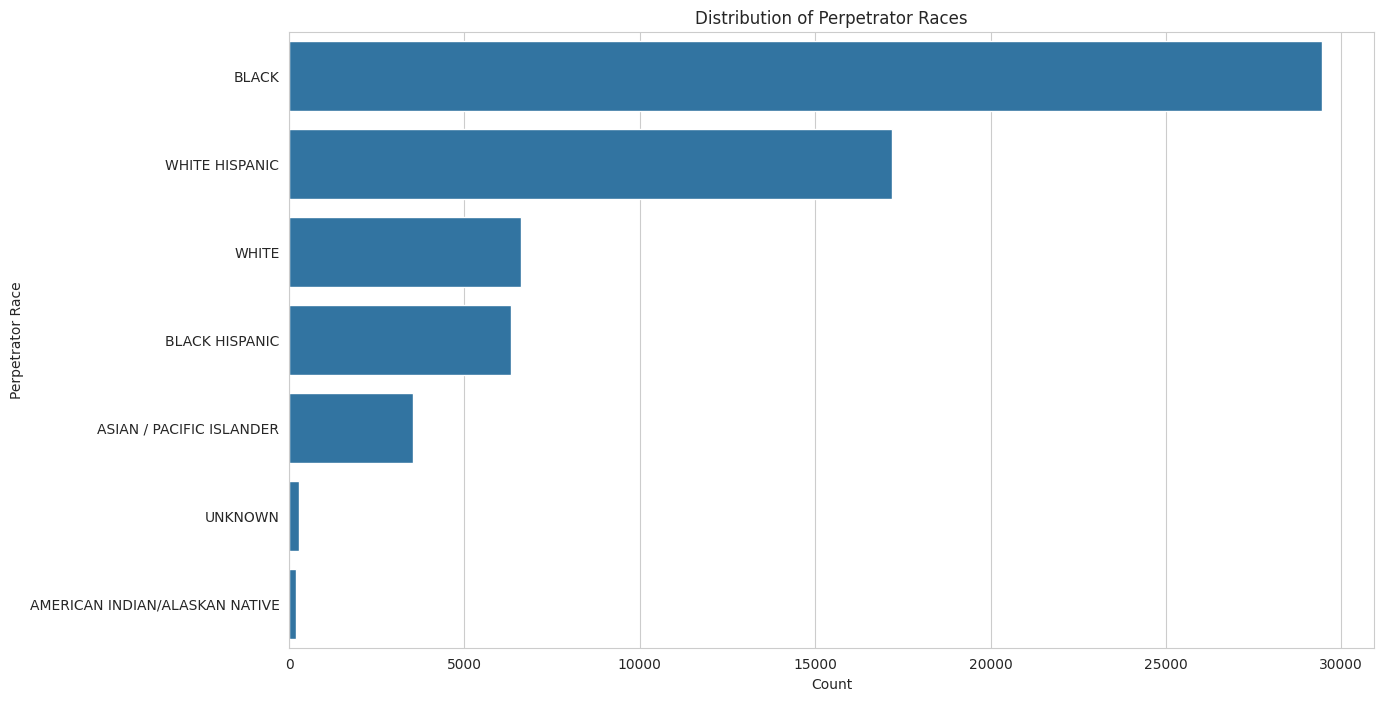

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

data_crime_time = data_crime.loc[:, ['ARREST_BORO', 'ARREST_PRECINCT', 'PERP_RACE', 'PERP_SEX']]

print(data_crime_time.columns)

plt.figure(figsize=(14, 8))

race_order = data_crime_time['PERP_RACE'].value_counts().index

sns.countplot(y='PERP_RACE', data=data_crime_time, order=race_order)

plt.ylabel('Perpetrator Race')
plt.xlabel('Count')
plt.title('Distribution of Perpetrator Races')
plt.show()

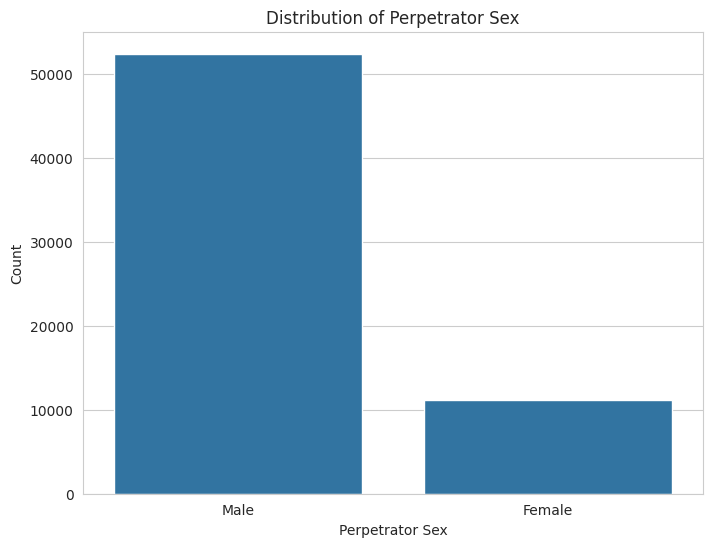

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='PERP_SEX', data=data_crime_time)
plt.xlabel('Perpetrator Sex')
plt.ylabel('Count')
plt.title('Distribution of Perpetrator Sex')

plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])

plt.show()

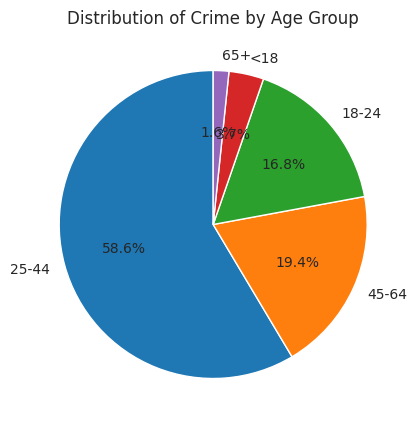

In [20]:
import matplotlib.pyplot as plt

age_group_counts = data_crime['AGE_GROUP'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Crime by Age Group')
plt.show()